In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from scipy.spatial.distance import pdist
from matplotlib import rcParams
rcParams.update({'font.size': 15})

# Dendrogram
***
* Dendrogram shows hierarchical ordering of subclusters of bottom-up (agglomerative) clustering algorithms.

Clustering itself occurs during _linkage_ procedure, where disntance between elements are analyzed.<br> 
If method 'single' is selected, agglomeration begins with two elements that are the closest.<br>
Mind that _'closeness'_ can be calculated using different norms. Euclidean norm or L2 is the most common.<br>
Two closest points are merge into to one mini-cluster and calculated procedes forward.
***

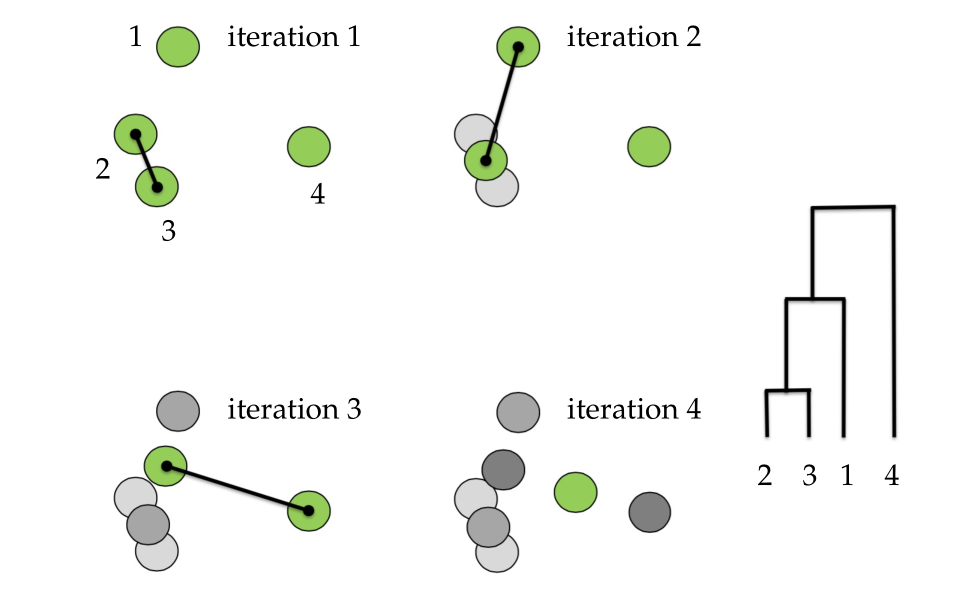



## Generate Data
(Same data as in part 02)

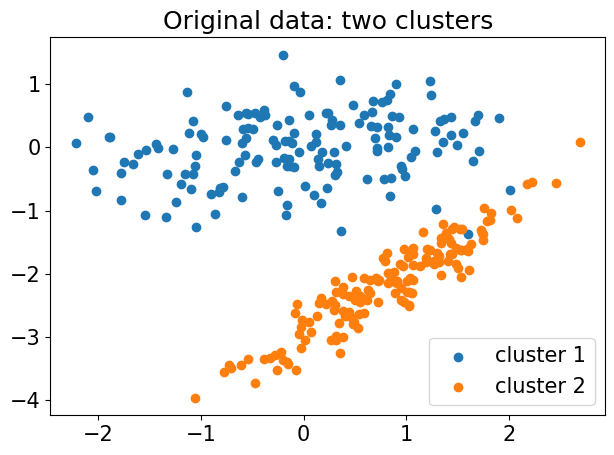

In [81]:
n1 = 50
n2 = 100
np.random.seed(69)

scale_1 = np.array([[0.9,0],[0,0.5]])
cluster_1 = scale_1 @ np.random.randn(2,n1+n2)   # [x,y] : (2,N)
scale_2 = np.array([[1,0],[0,0.2]]) 
cluster_2 = scale_2 @ np.random.randn(2,n1+n2)

theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
offset = np.array([[1,-2]]).T
cluster_2 = R @ cluster_2 + offset

fig, ax = plt.subplots(1,tight_layout=True)
ax.scatter(*cluster_1, label= 'cluster 1')
ax.scatter(*cluster_2, label= 'cluster 2')
ax.set_title('Original data: two clusters')
plt.legend();

In [74]:
train_1 = cluster_1.T[:n1]
train_2 = cluster_2.T[:n1]
train_all = np.vstack((train_1,train_2))
print(train_all.shape)

validate_1 = cluster_1.T[n1:]
validate_2 = cluster_2.T[n1:]

(100, 2)


## Linkage, Dendrogram plot
* Calculate dinstances between all pairs of elements
* Construct a denrogram
* Manually select threshold to analyze different variants of clustering

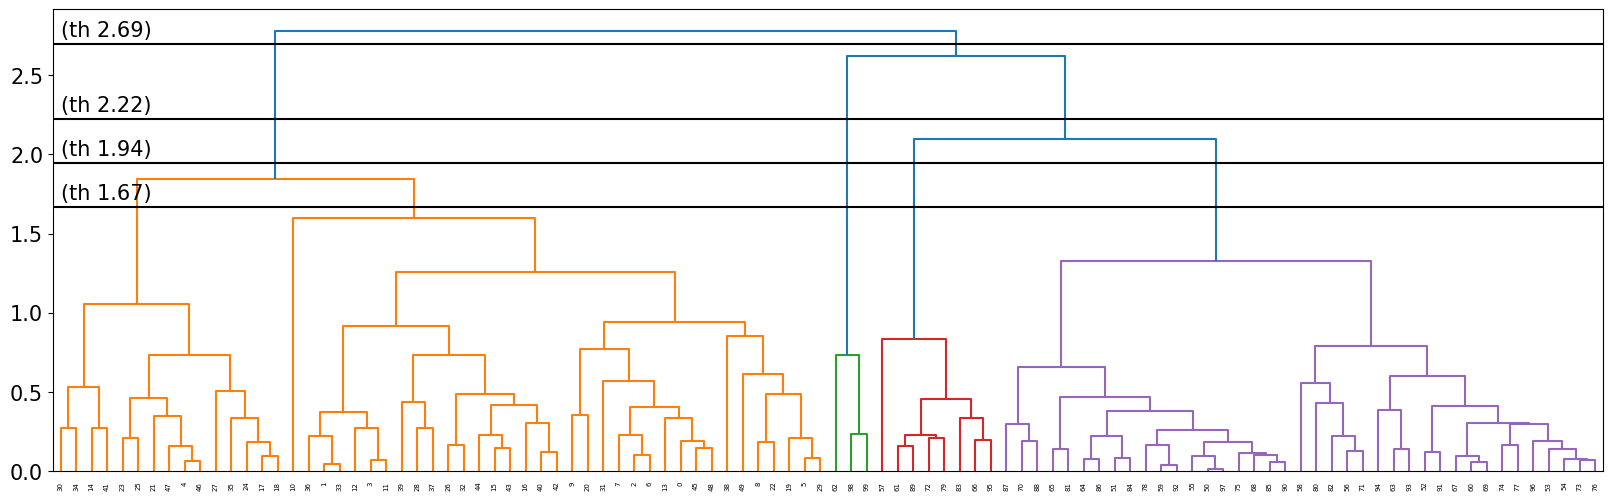

In [75]:
X = pdist(train_all, metric='euclidean')
Z = linkage(X, method='average')
fig,ax = plt.subplots(figsize=(20, 6))
dn = dendrogram(Z)
mx = np.max(Z[:,2])
thresholds = [a*mx for a in [0.6, 0.7, 0.8,  0.97]]
for th in thresholds:
    ax.axhline(y = th, c= 'k', label = f'threhold= {th:0.2f}')
    ax.text(x = 5, y = th+0.05, s = f'(th {th:0.2f})')
#plt.legend()

# Plot different clustering outcomes
fcluster() allows to return clusters from linkage() for specified threshold

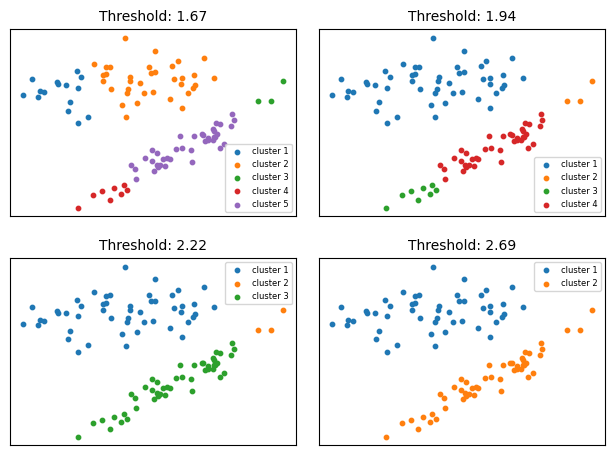

In [80]:
fig, ax = plt.subplots(2,2,tight_layout=True, sharex=True, sharey=True)
ax = ax.flatten()
for i,th in enumerate(thresholds):
    clusters = fcluster(Z, th, criterion='distance')
    num_clusters = np.max(clusters)
    cluster_IDs = np.arange(1, num_clusters + 1, 1)
    for ID in cluster_IDs:
        mask = clusters == ID
        ax[i].scatter(*train_all[mask].T, label= f'cluster {ID}', s = 10)
    ax[i].legend(fontsize = 6)
    ax[i].set_title(f'Threshold: {th:0.2f}',fontsize = 10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])   
    